# Breast Cancer Mortality and Survival Prediction

Notebook 2: Classification Models for Mortality Status Prediction


Author: Thanuja

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
import warnings

In [56]:
# import pandas and read two files name classificaion csv
classification_df = pd.read_csv('classification_dataset.csv')

classification_df.head()

,Month_of_Birth,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Mortality_Status
0,12,68,1,0,0,0,1,3,1,4,1,1,24.0,1,0
1,12,50,1,1,1,2,0,2,1,35,1,1,14.0,5,0
2,11,58,1,2,2,4,0,2,1,63,1,1,14.0,7,0
3,3,58,1,0,0,0,1,3,1,18,1,1,2.0,1,0
4,1,47,1,1,0,1,1,3,1,41,1,1,3.0,1,0


In [57]:
# Splitting the dataset into features (X) and target (y)
X = classification_df.drop(columns=['Mortality_Status'])
y = classification_df['Mortality_Status']

In [58]:
# Splitting into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [59]:
print('Whole DataSet Shape: ' ,classification_df.shape)
print('X_train Shape: ' ,X_train.shape)
print('X_test Shape: ' ,X_test.shape)
print('y_train Shape: ' ,y_train.shape)
print('y_test Shape: ' ,y_test.shape)

Whole DataSet Shape:  (3257, 15)
X_train Shape:  (2605, 14)
X_test Shape:  (652, 14)
y_train Shape:  (2605,)
y_test Shape:  (652,)


In [60]:
# Check class distribution in the whole dataset
print("\nClass Distribution in the Whole Dataset:")
print(classification_df['Mortality_Status'].value_counts())  # Replace 'target_column' with the actual name of your target column

# Check class distribution in the training set
print("\nClass Distribution in the Training Set:")
print(y_train.value_counts())

# Check class distribution in the testing set
print("\nClass Distribution in the Test Set:")
print(y_test.value_counts())

# Calculate the proportion of each class in the target variable for train and test sets
print("\nProportion of each class in the Training Set:")
print(y_train.value_counts(normalize=True))

print("\nProportion of each class in the Test Set:")
print(y_test.value_counts(normalize=True))



Class Distribution in the Whole Dataset:
Mortality_Status
0    2895
1     362
Name: count, dtype: int64

Class Distribution in the Training Set:
Mortality_Status
0    2315
1     290
Name: count, dtype: int64

Class Distribution in the Test Set:
Mortality_Status
0    580
1     72
Name: count, dtype: int64

Proportion of each class in the Training Set:
Mortality_Status
0    0.888676
1    0.111324
Name: proportion, dtype: float64

Proportion of each class in the Test Set:
Mortality_Status
0    0.889571
1    0.110429
Name: proportion, dtype: float64


In [61]:
# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)

# Apply SMOTE on the training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Print the class distribution after applying SMOTE
print(f"Class distribution after SMOTE:")
print(pd.Series(y_train_res).value_counts())

Class distribution after SMOTE:
Mortality_Status
0    2315
1    2315
Name: count, dtype: int64


In [62]:
# Function to evaluate classification models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    auc = roc_auc_score(y_test, y_pred_prob)

    print(f"\n--- {model_name} Performance ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Alive', 'Dead'],
                yticklabels=['Alive', 'Dead'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Alive', 'Dead']))

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return model, accuracy, precision, recall, f1, auc


Naive Bayes Classifier

--- Naive Bayes Performance ---
Accuracy: 0.2592
Precision: 0.1229
Recall: 0.9306
F1 Score: 0.2172
AUC: 0.6341


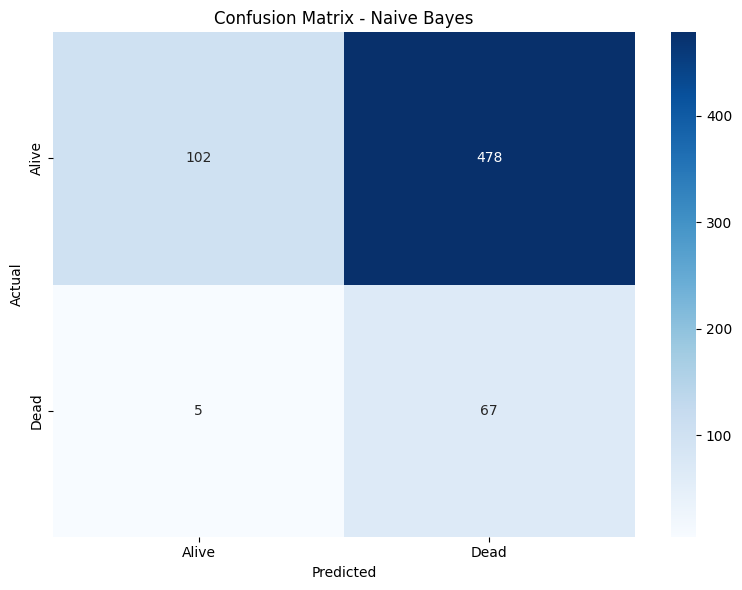


Classification Report:
              precision    recall  f1-score   support

       Alive       0.95      0.18      0.30       580
        Dead       0.12      0.93      0.22        72

    accuracy                           0.26       652
   macro avg       0.54      0.55      0.26       652
weighted avg       0.86      0.26      0.29       652



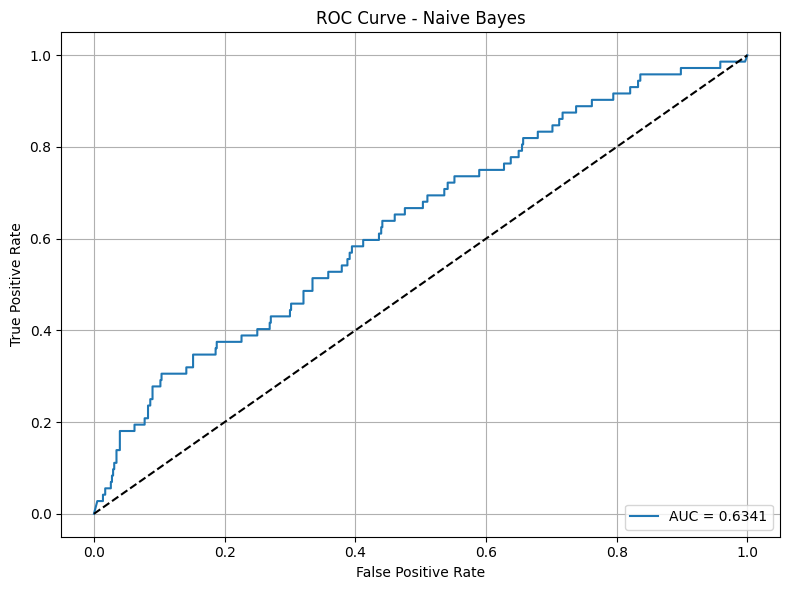

In [63]:
# 1. Naive Bayes Classifier
print("\nNaive Bayes Classifier")
nb_model = GaussianNB()
nb_model, nb_accuracy, nb_precision, nb_recall, nb_f1, nb_auc = evaluate_model(
    nb_model, X_train_res, X_test, y_train_res, y_test, "Naive Bayes")


Logistic Regression Classifier

--- Logistic Regression Performance ---
Accuracy: 0.7009
Precision: 0.1525
Recall: 0.3750
F1 Score: 0.2169
AUC: 0.5977


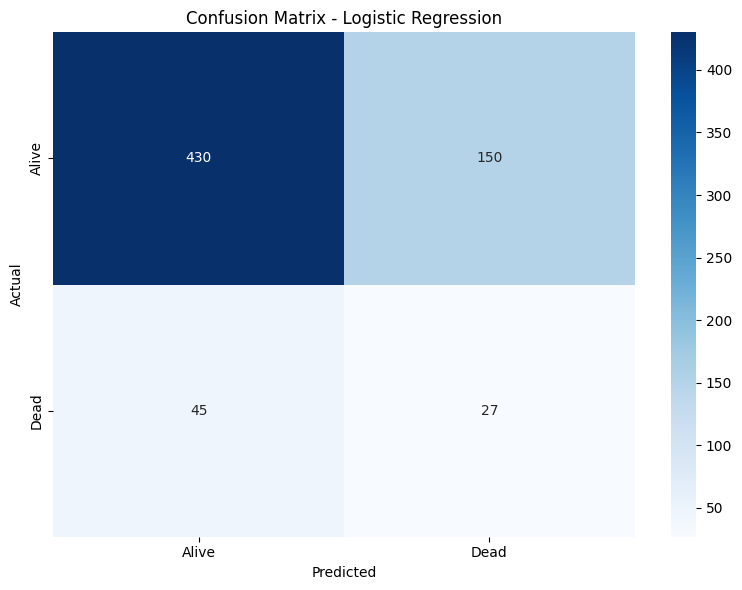


Classification Report:
              precision    recall  f1-score   support

       Alive       0.91      0.74      0.82       580
        Dead       0.15      0.38      0.22        72

    accuracy                           0.70       652
   macro avg       0.53      0.56      0.52       652
weighted avg       0.82      0.70      0.75       652



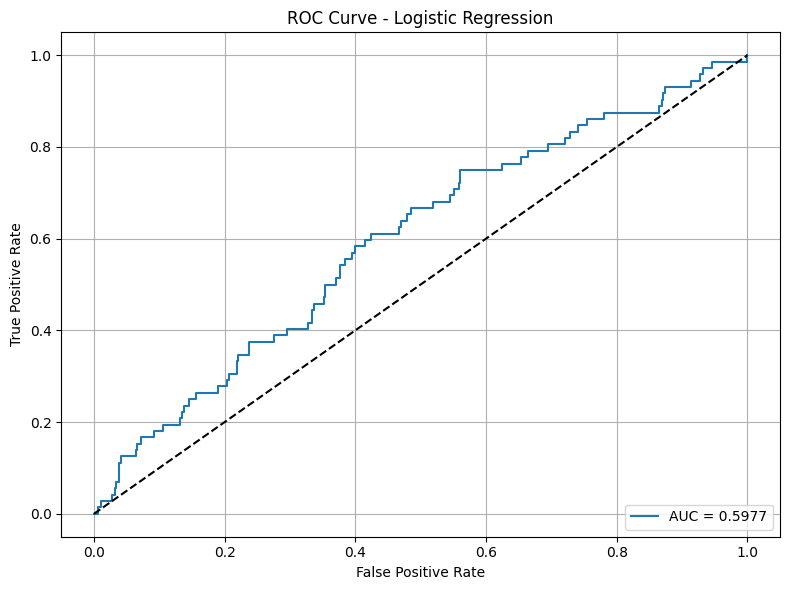

In [64]:
# 2. Logistic Regression Classifier
print("\nLogistic Regression Classifier")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model, lr_accuracy, lr_precision, lr_recall, lr_f1, lr_auc = evaluate_model(
    lr_model, X_train_res, X_test, y_train_res, y_test, "Logistic Regression")


K-Nearest Neighbors Classifier

--- K-Nearest Neighbors Performance ---
Accuracy: 0.6595
Precision: 0.1394
Recall: 0.4028
F1 Score: 0.2071
AUC: 0.5374


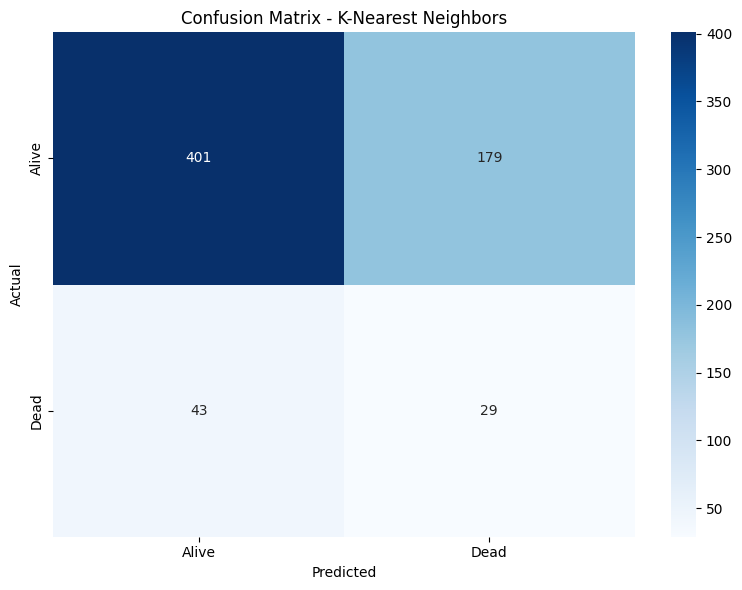


Classification Report:
              precision    recall  f1-score   support

       Alive       0.90      0.69      0.78       580
        Dead       0.14      0.40      0.21        72

    accuracy                           0.66       652
   macro avg       0.52      0.55      0.50       652
weighted avg       0.82      0.66      0.72       652



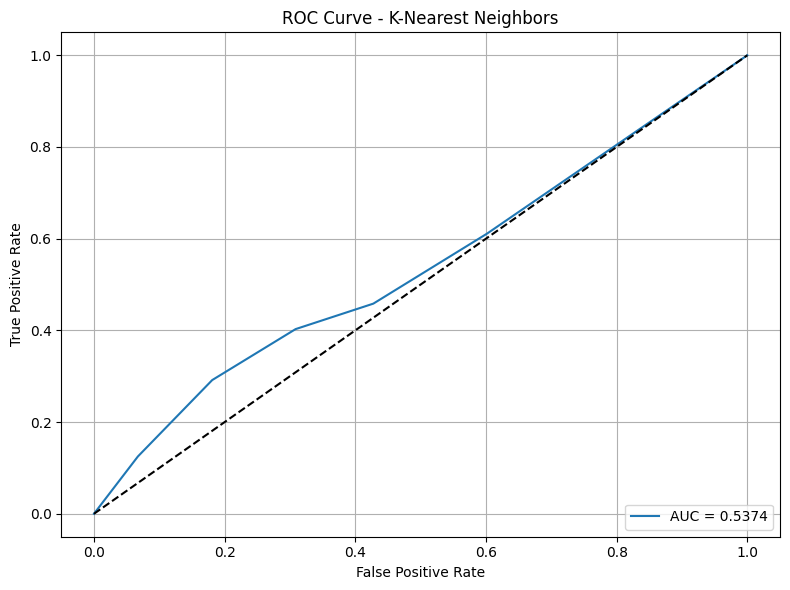

In [65]:
# 3. K-Nearest Neighbors Classifier
print("\nK-Nearest Neighbors Classifier")
knn_model = KNeighborsClassifier()
knn_model, knn_accuracy, knn_precision, knn_recall, knn_f1, knn_auc = evaluate_model(
    knn_model, X_train_res, X_test, y_train_res, y_test, "K-Nearest Neighbors")

In [66]:
# Compare models performance
models = ['Naive Bayes', 'Logistic Regression', 'K-Nearest Neighbors']
accuracy_scores = [nb_accuracy, lr_accuracy, knn_accuracy]
precision_scores = [nb_precision, lr_precision, knn_precision]
recall_scores = [nb_recall, lr_recall, knn_recall]
f1_scores = [nb_f1, lr_f1, knn_f1]
auc_scores = [nb_auc, lr_auc, knn_auc]

# Create dataframe for comparison
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'AUC': auc_scores
})

print("\nModel Comparison:")
print(results_df)


Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score       AUC
0          Naive Bayes  0.259202   0.122936  0.930556  0.217180  0.634052
1  Logistic Regression  0.700920   0.152542  0.375000  0.216867  0.597653
2  K-Nearest Neighbors  0.659509   0.139423  0.402778  0.207143  0.537380


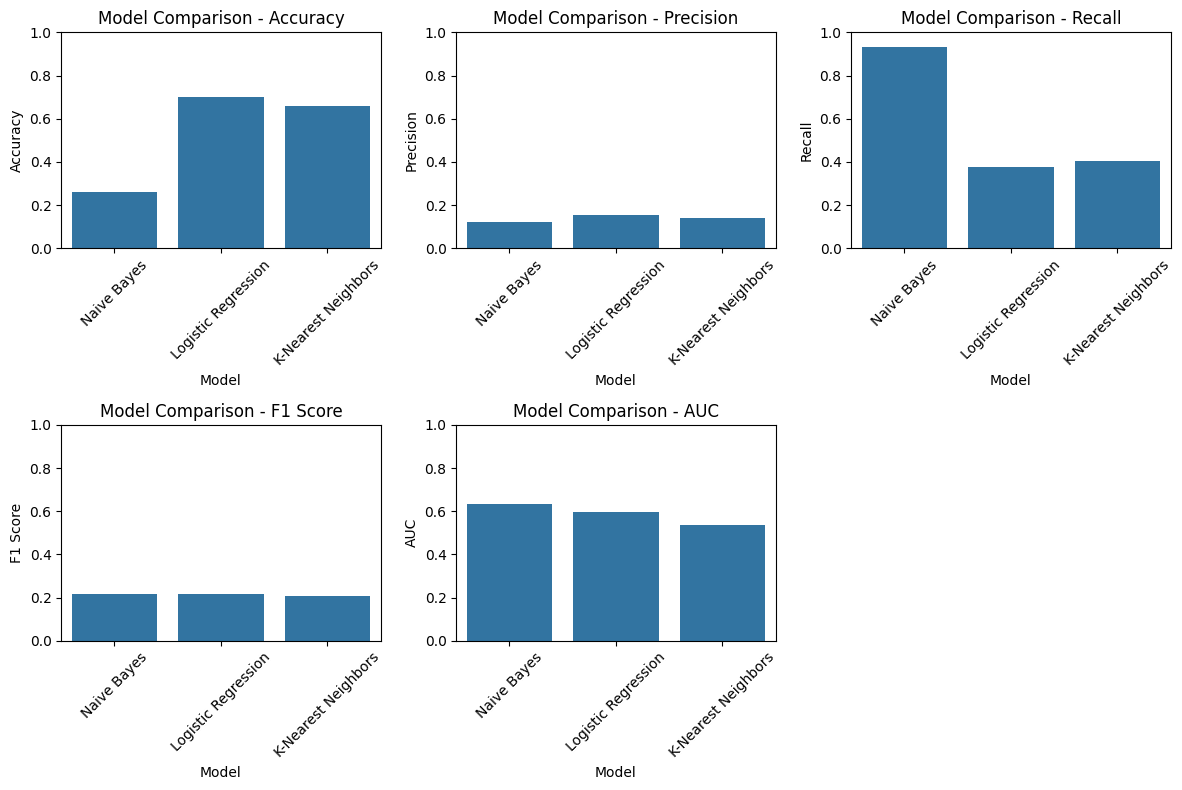

In [67]:
# Visualize model comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
plt.figure(figsize=(12, 8))
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(f'Model Comparison - {metric}')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [68]:
# Hyperparameter Tuning for Naive Bayes
print("\nHyperparameter Tuning for Naive Bayes")
# Define parameter grid for Naive Bayes
nb_param_grid = {
    'priors': [None, [0.9, 0.1], [0.7, 0.3], [0.5, 0.5]],  # Class priors can affect predictions
    'var_smoothing': np.logspace(-12, -6, 50)  # Keep the smoothing part
}


Hyperparameter Tuning for Naive Bayes


In [69]:
# Perform grid search
nb_grid_search = GridSearchCV(
    GaussianNB(),
    nb_param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1
)
nb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None, [0.9, 0.1], [0.7, 0.3], [0.5, 0.5]],
                         'var_smoothing': array([1.00000000e-12, 1.32571137e-12, 1.75751062e-12, 2.32995181e-12,
       3.08884360e-12, 4.09491506e-12, 5.42867544e-12, 7.19685673e-12,
       9.54095476e-12, 1.26485522e-11, 1.67683294e-11, 2.22299648e-11,
       2.94705170e-11, 3.90693994e-11, 5.17947468e-11, 6.8...
       2.68269580e-09, 3.55648031e-09, 4.71486636e-09, 6.25055193e-09,
       8.28642773e-09, 1.09854114e-08, 1.45634848e-08, 1.93069773e-08,
       2.55954792e-08, 3.39322177e-08, 4.49843267e-08, 5.96362332e-08,
       7.90604321e-08, 1.04811313e-07, 1.38949549e-07, 1.84206997e-07,
       2.44205309e-07, 3.23745754e-07, 4.29193426e-07, 5.68986603e-07,
       7.54312006e-07, 1.00000000e-06])},
             scoring='accuracy', verbose=1)

In [70]:
# Print best parameters and score
print(f"Best parameters: {nb_grid_search.best_params_}")
print(f"Best cross-validation score: {nb_grid_search.best_score_:.4f}")

Best parameters: {'priors': [0.9, 0.1], 'var_smoothing': np.float64(1e-06)}
Best cross-validation score: 0.7743



--- Tuned Naive Bayes Performance ---
Accuracy: 0.7715
Precision: 0.2345
Recall: 0.4722
F1 Score: 0.3134
AUC: 0.7092


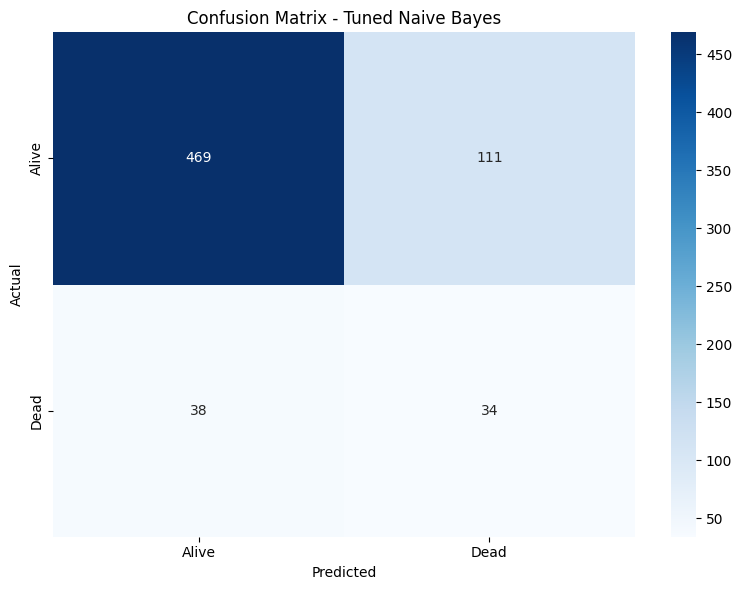


Classification Report:
              precision    recall  f1-score   support

       Alive       0.93      0.81      0.86       580
        Dead       0.23      0.47      0.31        72

    accuracy                           0.77       652
   macro avg       0.58      0.64      0.59       652
weighted avg       0.85      0.77      0.80       652



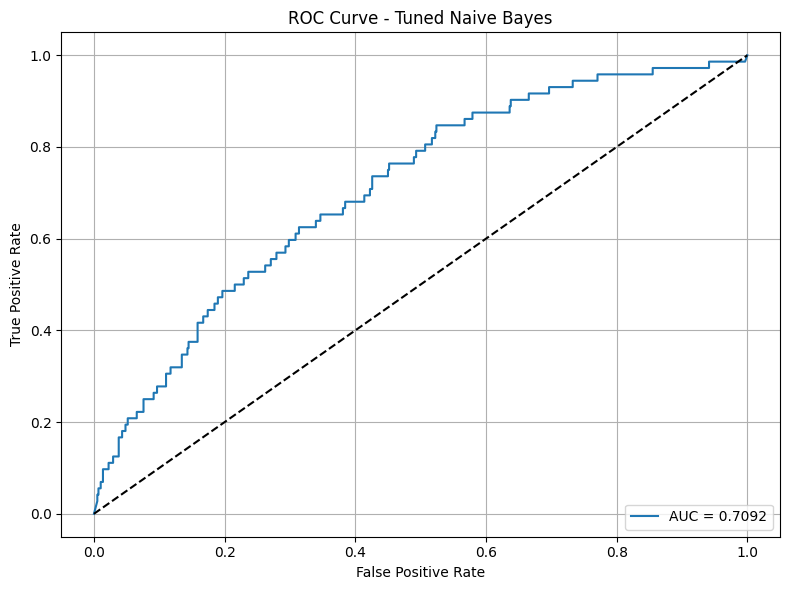

In [71]:
# Evaluate the tuned Naive Bayes model
nb_tuned_model = nb_grid_search.best_estimator_
nb_tuned_model, nb_tuned_accuracy, nb_tuned_precision, nb_tuned_recall, nb_tuned_f1, nb_tuned_auc = evaluate_model(
    nb_tuned_model, X_train, X_test, y_train, y_test, "Tuned Naive Bayes")

In [72]:
# Hyperparameter Tuning for Logistic Regression
print("\nHyperparameter Tuning for Logistic Regression")
lr_param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [15000, 20000],
}


Hyperparameter Tuning for Logistic Regression


In [73]:
# Perform exhaustive search with GridSearchCV
lr_grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    lr_param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1
)

# Fit the model
lr_random_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_iter=20,
                   param_distributions={'C': [0.1, 1, 10],
                                        'max_iter': [15000, 20000],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='accuracy', verbose=1)

In [74]:
# Print best parameters and score
print(f"Best parameters: {lr_random_search.best_params_}")
print(f"Best cross-validation score: {lr_random_search.best_score_:.4f}")

Best parameters: {'solver': 'liblinear', 'max_iter': 15000, 'C': 10}
Best cross-validation score: 0.8887



--- Tuned Logistic Regression Performance ---
Accuracy: 0.8911
Precision: 1.0000
Recall: 0.0139
F1 Score: 0.0274
AUC: 0.6986


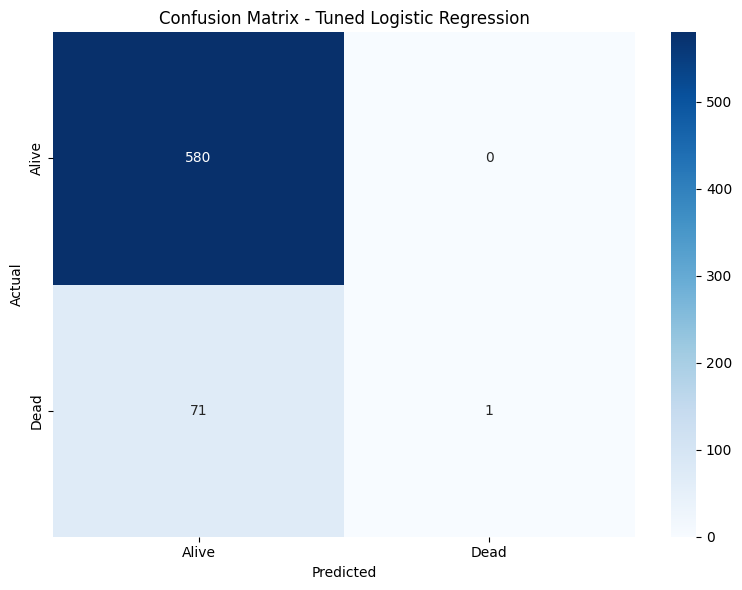


Classification Report:
              precision    recall  f1-score   support

       Alive       0.89      1.00      0.94       580
        Dead       1.00      0.01      0.03        72

    accuracy                           0.89       652
   macro avg       0.95      0.51      0.48       652
weighted avg       0.90      0.89      0.84       652



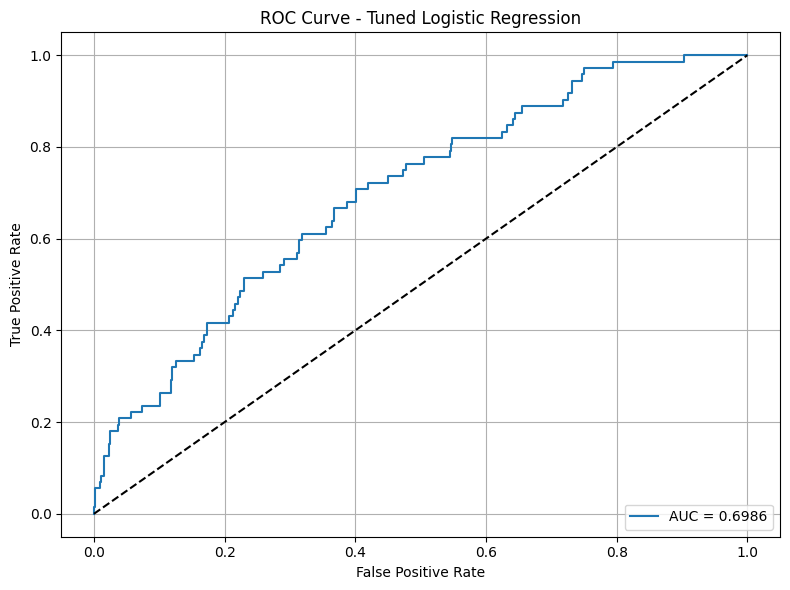

In [75]:
# Evaluate the tuned Logistic Regression model
lr_tuned_model = lr_random_search.best_estimator_
lr_tuned_model, lr_tuned_accuracy, lr_tuned_precision, lr_tuned_recall, lr_tuned_f1, lr_tuned_auc = evaluate_model(
    lr_tuned_model, X_train, X_test, y_train, y_test, "Tuned Logistic Regression")

In [76]:
# Hyperparameter Tuning for K-Nearest Neighbors
print("\nHyperparameter Tuning for K-Nearest Neighbors")
# Define parameter grid for KNN
knn_param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}


Hyperparameter Tuning for K-Nearest Neighbors


In [77]:
# Perform randomized search
knn_random_search = GridSearchCV(
    KNeighborsClassifier(),
    knn_param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
)
knn_random_search.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [78]:
# Print best parameters and score
print(f"Best parameters: {knn_random_search.best_params_}")
print(f"Best cross-validation score: {knn_random_search.best_score_:.4f}")

Best parameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}
Best cross-validation score: 0.8894



--- Tuned K-Nearest Neighbors Performance ---
Accuracy: 0.8865
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC: 0.5635


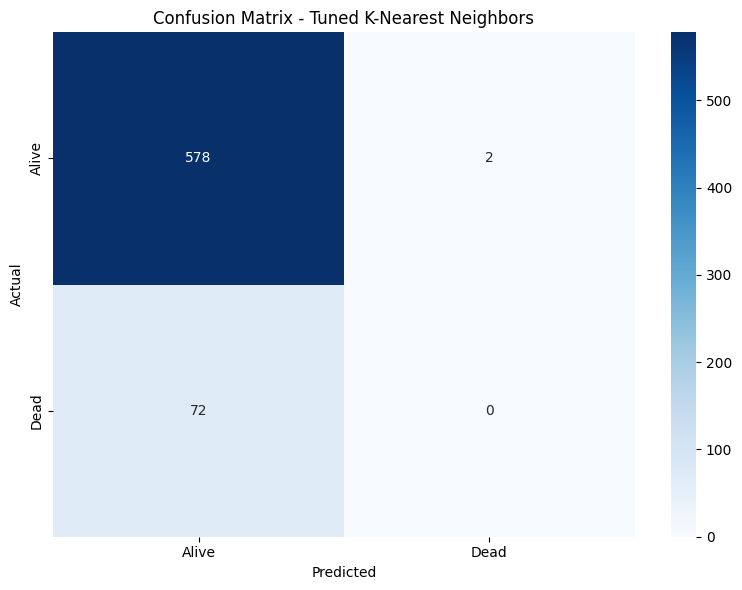


Classification Report:
              precision    recall  f1-score   support

       Alive       0.89      1.00      0.94       580
        Dead       0.00      0.00      0.00        72

    accuracy                           0.89       652
   macro avg       0.44      0.50      0.47       652
weighted avg       0.79      0.89      0.84       652



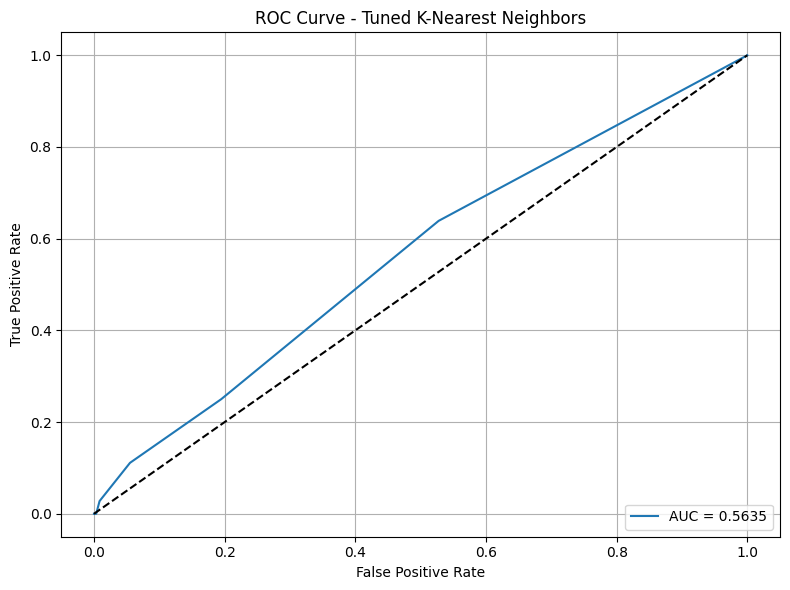

In [79]:
# Evaluate the tuned KNN model
knn_tuned_model = knn_random_search.best_estimator_
knn_tuned_model, knn_tuned_accuracy, knn_tuned_precision, knn_tuned_recall, knn_tuned_f1, knn_tuned_auc = evaluate_model(
    knn_tuned_model, X_train, X_test, y_train, y_test, "Tuned K-Nearest Neighbors")

In [80]:
# Compare original models with tuned models
models = ['Naive Bayes', 'Tuned Naive Bayes',
          'Logistic Regression', 'Tuned Logistic Regression',
          'K-Nearest Neighbors', 'Tuned K-Nearest Neighbors']
accuracy_scores = [nb_accuracy, nb_tuned_accuracy,
                   lr_accuracy, lr_tuned_accuracy,
                   knn_accuracy, knn_tuned_accuracy]
precision_scores = [nb_precision, nb_tuned_precision,
                    lr_precision, lr_tuned_precision,
                    knn_precision, knn_tuned_precision]
recall_scores = [nb_recall, nb_tuned_recall,
                 lr_recall, lr_tuned_recall,
                 knn_recall, knn_tuned_recall]
f1_scores = [nb_f1, nb_tuned_f1,
             lr_f1, lr_tuned_f1,
             knn_f1, knn_tuned_f1]
auc_scores = [nb_auc, nb_tuned_auc,
              lr_auc, lr_tuned_auc,
              knn_auc, knn_tuned_auc]

In [81]:
# Create dataframe for tuned models comparison
tuned_results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'AUC': auc_scores
})

print("\nTuned Model Comparison:")
print(tuned_results_df)


Tuned Model Comparison:
                       Model  Accuracy  Precision    Recall  F1 Score  \
0                Naive Bayes  0.259202   0.122936  0.930556  0.217180   
1          Tuned Naive Bayes  0.771472   0.234483  0.472222  0.313364   
2        Logistic Regression  0.700920   0.152542  0.375000  0.216867   
3  Tuned Logistic Regression  0.891104   1.000000  0.013889  0.027397   
4        K-Nearest Neighbors  0.659509   0.139423  0.402778  0.207143   
5  Tuned K-Nearest Neighbors  0.886503   0.000000  0.000000  0.000000   

        AUC  
0  0.634052  
1  0.709243  
2  0.597653  
3  0.698587  
4  0.537380  
5  0.563530  


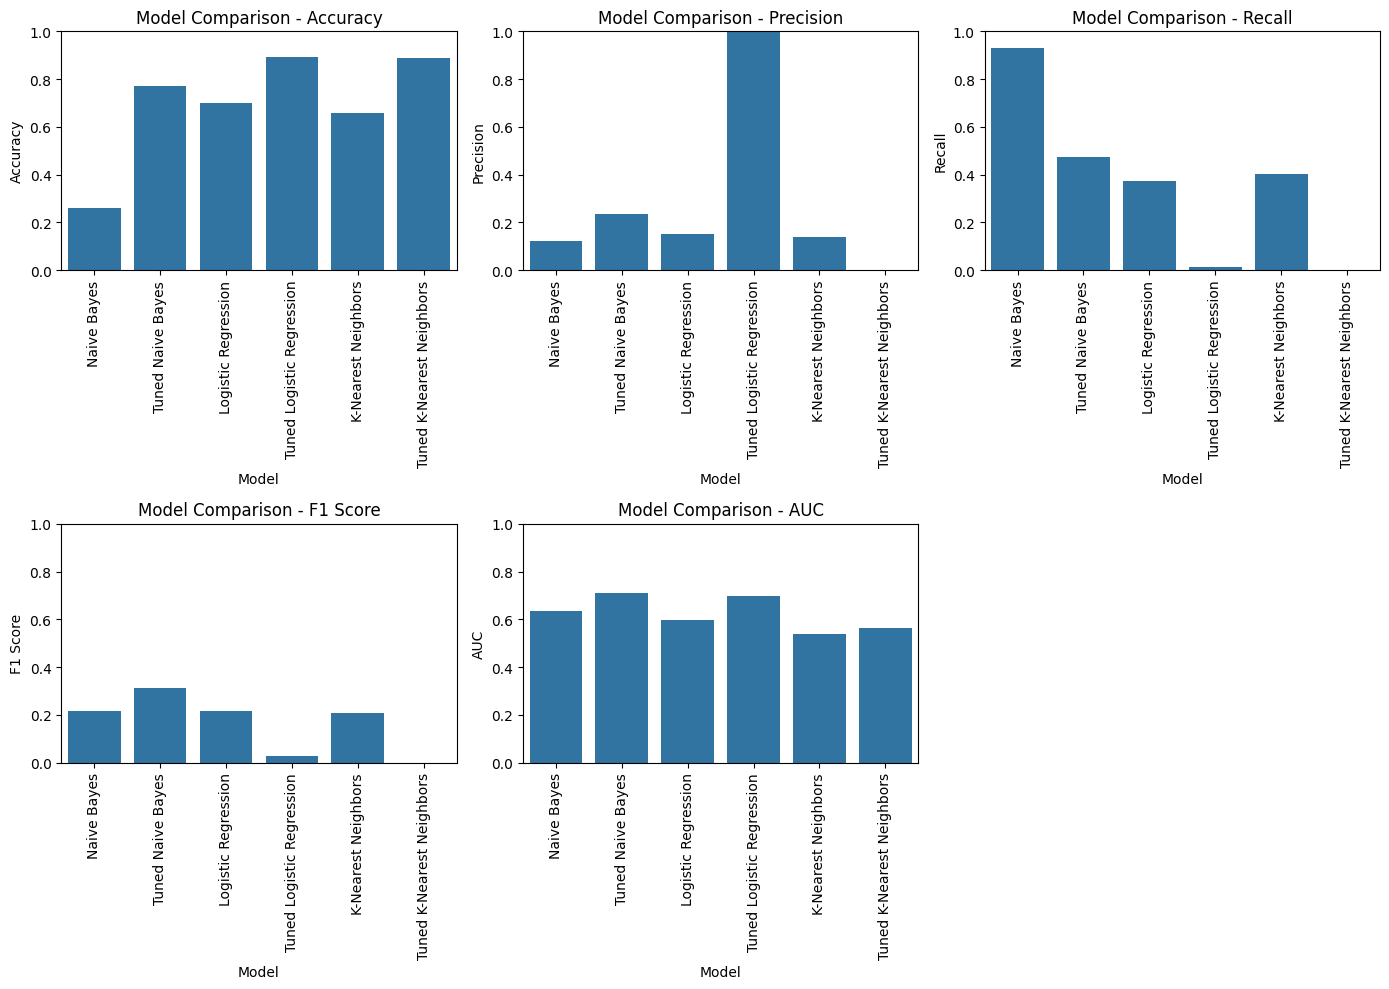


Best models saved for ensemble learning


In [82]:
# Visualize tuned model comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    sns.barplot(x='Model', y=metric, data=tuned_results_df)
    plt.title(f'Model Comparison - {metric}')
    plt.xticks(rotation=90)
    plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Save the best models for ensemble learning
# This code block is leveraged from Code Reuse Session 2
import pickle

# Determine the best model based on AUC score
best_models = {
    'naive_bayes': nb_tuned_model if nb_tuned_auc > nb_auc else nb_model,
    'logistic_regression': lr_tuned_model if lr_tuned_auc > lr_auc else lr_model,
    'knn': knn_tuned_model if knn_tuned_auc > knn_auc else knn_model
}

# Save models for later use in ensemble
for name, model in best_models.items():
    with open(f'{name}_model.pkl', 'wb') as file:
        pickle.dump(model, file)

print("\nBest models saved for ensemble learning")


Feature Importance from Logistic Regression:
                   Feature  Importance
2                      Sex    1.144009
11     Progesterone_Status    0.598329
10         Estrogen_Status    0.560972
7                    Grade    0.371538
3                  T_Stage    0.350164
8                  A_Stage    0.323797
4                  N_Stage    0.278847
13  Regional_Node_Positive    0.074861
5                6th_Stage    0.049894
6           Differentiated    0.045216
12  Regional_Node_Examined    0.034250
1                      Age    0.031698
0           Month_of_Birth    0.011515
9               Tumor_Size    0.003167


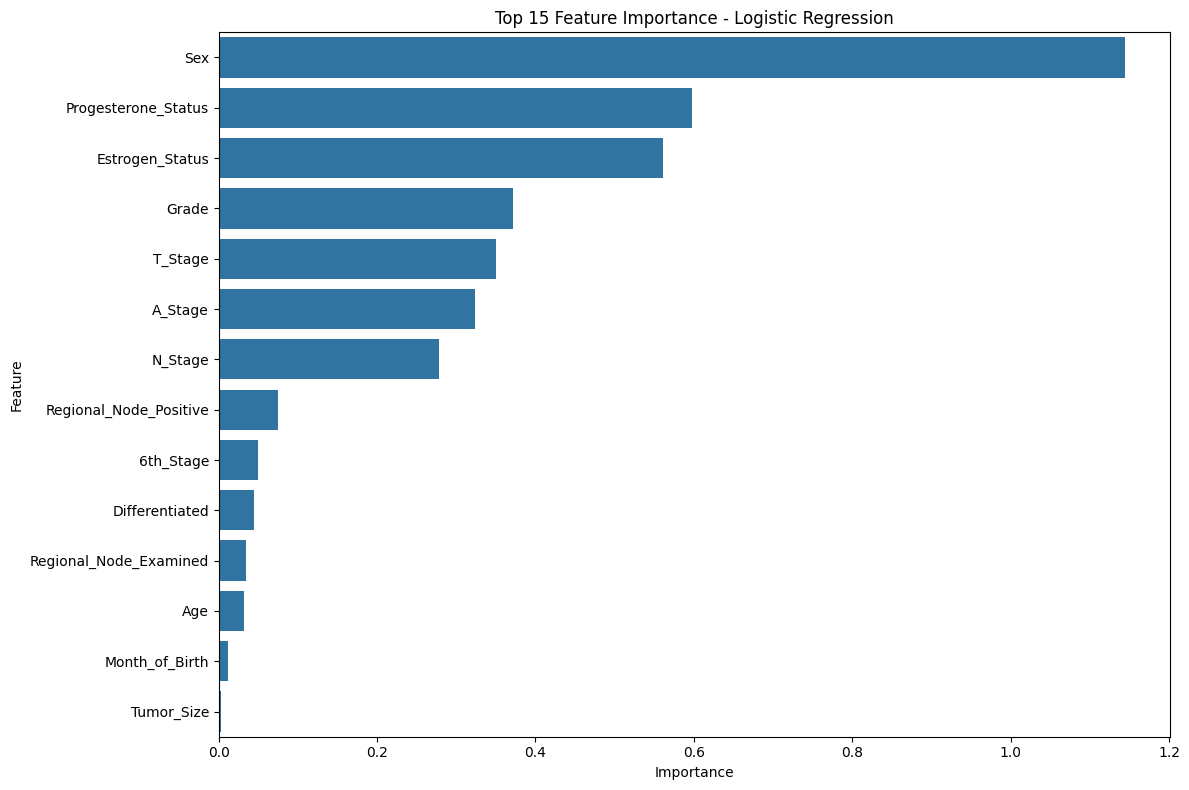

In [83]:
# Feature importance analysis for Logistic Regression
# Get the best logistic regression model
best_lr_model = best_models['logistic_regression']

# Check if the model has the coef_ attribute (it should for LogisticRegression)
if hasattr(best_lr_model, 'coef_'):
    # Get feature importance
    feature_importance = abs(best_lr_model.coef_[0])
    feature_names = X_train.columns

    # Create a dataframe for better visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    })

    # Sort by importance
    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

    print("\nFeature Importance from Logistic Regression:")
    print(feature_importance_df)

    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
    plt.title('Top 15 Feature Importance - Logistic Regression')
    plt.tight_layout()
    plt.show()
else:
    print("Selected logistic regression model doesn't have feature importance coefficients")

In [84]:
# Summary of classification modeling results
print("\nClassification Modeling Summary")
print("The following classification models were built and evaluated:")
print("1. Naive Bayes")
print("2. Logistic Regression")
print("3. K-Nearest Neighbors")
print("\nHyperparameter tuning was performed for all models.")
print("\nBest performing model based on AUC score:")
best_model_idx = tuned_results_df['AUC'].idxmax()
best_model = tuned_results_df.loc[best_model_idx]
print(f"Model: {best_model['Model']}")
print(f"Accuracy: {best_model['Accuracy']:.4f}")
print(f"Precision: {best_model['Precision']:.4f}")
print(f"Recall: {best_model['Recall']:.4f}")
print(f"F1 Score: {best_model['F1 Score']:.4f}")
print(f"AUC: {best_model['AUC']:.4f}")


Classification Modeling Summary
The following classification models were built and evaluated:
1. Naive Bayes
2. Logistic Regression
3. K-Nearest Neighbors

Hyperparameter tuning was performed for all models.

Best performing model based on AUC score:
Model: Tuned Naive Bayes
Accuracy: 0.7715
Precision: 0.2345
Recall: 0.4722
F1 Score: 0.3134
AUC: 0.7092
